## data visualization  
Most useRs tend to use the `ggplot2` package for data visualization. However before we delve into `ggplot2` we will explain the base r plotting system, because many useful methods exists for this system, especially in the context of statistical analysis like residual plots.  

### base plotting methods  
With base plotting you can modify the graphs in any little details you would like, this is however not very intuitive and requires quite a large amount of time to master. It is easier and quicker to do with the `theme_` system from the `ggplot2` package. In addition we can only recommend to modify little details using vector based images and import these into for example illustrator (since the university has an faculty wide license anyway).    




### method dispatch  
Method dispatch is everywhere in R. Functions call methods depending on the class of the input argument to the function. You can display the available methods for the plot function with `methods(plot)`. We will show you an example using the `plot` function, first we create three different object or data classes, then observe the behavior of the plot function:  

In [19]:
require(dplyr)
require(tidyr)

Loading required package: tidyr


In [ ]:
plot(iris)

In [9]:
iris_clust <- hclust(dist(iris[, -5])) # calculate distances and clustering for the iris data

In [ ]:
plot(iris_clust , labels = iris$Species)

In [ ]:
plot(Petal.Length ~ Species, data = iris)


This happens because the plot function will use a different method depending on the input argument class and data type. This is called method dispatch. All available methods can be seen with a call to `methods`:  

In [ ]:
methods(plot)

There are many useful methods in base R, and this is one of the reasons to still learn base R. For example for a statistical analysis you might want to quickly check your assumptions, a quick call to `plot` will provide you with the needed figures:  

In [ ]:
anova_model <- lm(Sepal.Length ~ Species, data = iris)
plot(anova_model)

### base plotting

A basic anotated plot can be created with the following arguments:

$setosa
NULL

$versicolor
NULL

$virginica
NULL

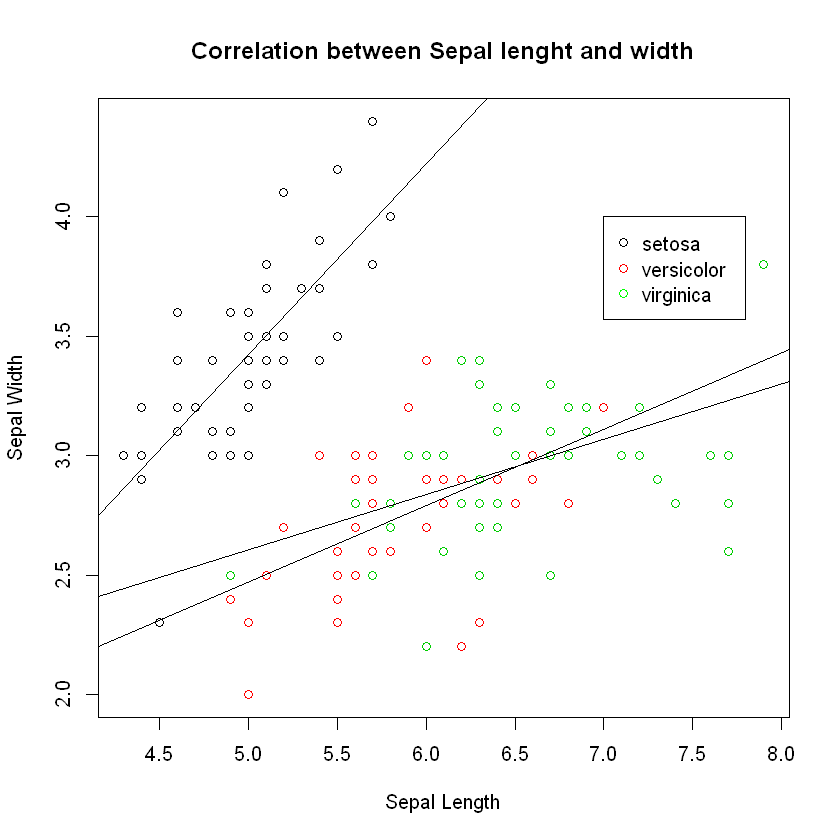

In [47]:
# the plot of the data itself
plot(x = iris$Sepal.Length, y = iris$Sepal.Width, 
     col = iris$Species, 
     main = "Correlation between Sepal lenght and width",
     xlab = "Sepal Length", ylab = "Sepal Width"         
    )
# adding a legend
legend(x = 7, y = 4, legend = unique(iris$Species), 
       col = c("black", "red", "green"), pch = 1)

# linear model per species subset:
lm_mod <- lapply(split(iris, f = iris$Species), function(x) {
  lm(Sepal.Width ~ Sepal.Length, data = x )
})

# plot the 3 linear models with abline
lapply(lm_mod, abline)

Note how the `legend` function adds data to the existing plot.  
`col` : the color, a long vector of the `iris$Species` is provided, giving each data point a color, the conversion from factor and charachter to color is done automatically.  
`main` : main title of the plot.  

We are not going into statistics in this course, so don't worry about the code and just know that a linear model is fit on each species subset of iris. The three models are added to the plot with the `abline` function.  

The rest is pretty obvious, maybe only the order of the colors, well that is a bit tricky. It is the match between the alphabetically ordered characters and the default ordering of colors from the base plotting system: "black" - "red" - "green"


* exercise 1: The code for the plot above consists of 4 sub parts, run each part in a seperate cell and observe the output and understand the function of each part.  

* exercise 2: For the `Theoph` dataset, plot the time on the x axis, the concentration on the y axis, and assign colors and a legend to the subjects. Define appropriate x and y labels and a title.   

### plotting with ggplot2

In [50]:
require(ggplot2)

Loading required package: ggplot2


The syntax for creating figures in `ggplot2` is very concise. With only a few lines you can create any figure you would want.  
Start with the function call `ggplot()` and add the `data` and aesthetics argument `aes()`:  

In [ ]:
ggplot(data = Theoph, aes(x = Time, y = conc)) # no output will be shown, as no geometry has been defined yet.  

The `aes()` is used when you want to map some aesthetic to your data. If you want to provide a manual color, then you do not use the `aes()` argument. `Time` and `conc` are mapped to the x and y aesthetics, and since they are from the `Theoph` dataframe, you need the `aes()`.  
Next, we add a geometry, with `geom_...()`. This defines the shape of the graph, for example boxplots, lines or points.  

In [ ]:
ggplot(data = Theoph, aes(x = Time, y = conc)) + geom_point()

You might have noticed the `+`, which is the `ggplot2` syntax for adding so called `layers` of information to your plot.  
Let us now add another layer, a `theme`, which will define the look of the plot, using `theme_...()`.  

In [ ]:
ggplot(data = Theoph, aes(x = Time, y = conc)) + geom_point() + theme_minimal()

Next, we add some shapes to identify the subjects, and some colors to the $\frac{dose}{weight}$ of these individuals. 

In [ ]:
ggplot(data = Theoph, aes(x = Time, y = conc)) + geom_point(aes(color = Dose/Wt)) + theme_minimal()

Next, we add loess regression to each Subject time course:  

In [ ]:
ggplot(data = Theoph, aes(x = Time, y = conc)) + geom_point(aes(color = Dose/Wt)) +
geom_smooth(aes(group = Subject), method = 'loess') + theme_minimal() 

Hmm, the grey shaded area is messing up the visual, lets make it a bit more see-through with the alpha argument:  

In [ ]:
ggplot(data = Theoph, aes(x = Time, y = conc)) + geom_point(aes(color = Dose/Wt)) +
geom_smooth(aes(group = Subject), method = 'loess', alpha = 0.1) + theme_minimal() 

But what if we are interested in the individuals? We can easily split of the figure with `facet_wrap`!  

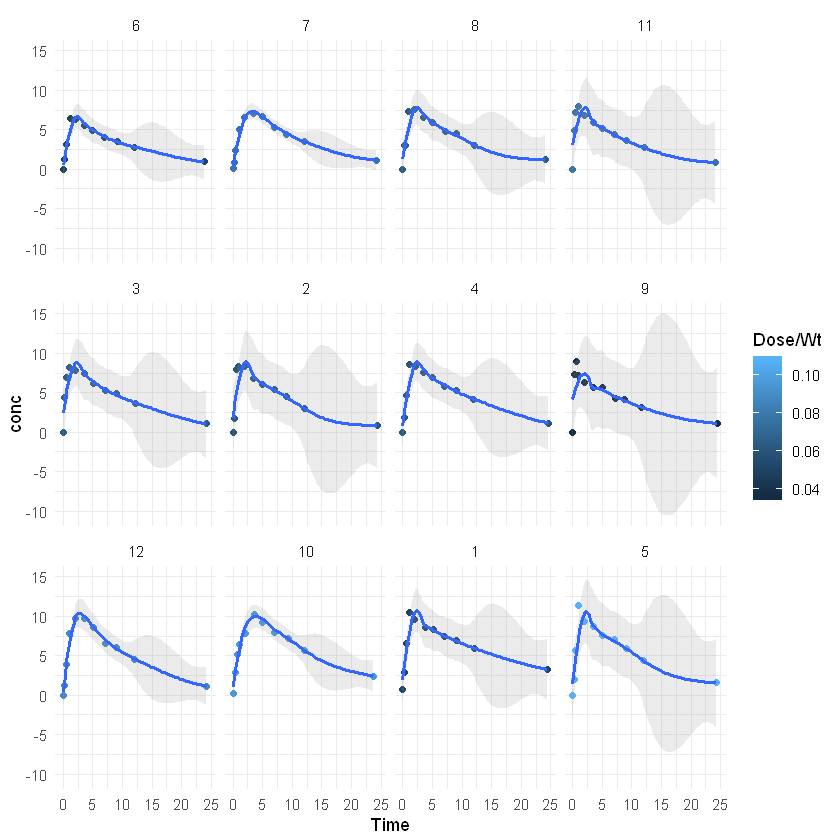

In [82]:
ggplot(data = Theoph, aes(x = Time, y = conc)) + geom_point(aes(color = Dose/Wt)) +
geom_smooth(aes(group = Subject), method = 'loess', alpha = 0.2) + theme_minimal() + facet_wrap(~Subject)

* exercise 3: Use the `ggplot2` package to plot the `iris` data, make sure you the figure makes it clear what measurement would be best suited to classify the 3 species.  

* exercise 4: **Carefully** have a look at the `diamonds` dataset. use `head()` and `summary()`. Don't try to print everything to screen and crash the server.   

* exercise 5: select 1000 random diamonds and store it in the placeholder `diamonds_small`, you can use the `sample()` function and sample from `1 : nrow(diamonds)` and use this sample as a row selection with `filter()` from `dplyr`, or use base-r syntax.  

* exercise 6: Use `ggplot2` to plot `diamonds_small` with `carat` on the x-axis, `price` on the y-axis, the `cut` mapped to color.  
Add a loess regression fit to the plot for each `cut` group.

### heatmaps with pheatmap


In [54]:
require(pheatmap)

Loading required package: pheatmap


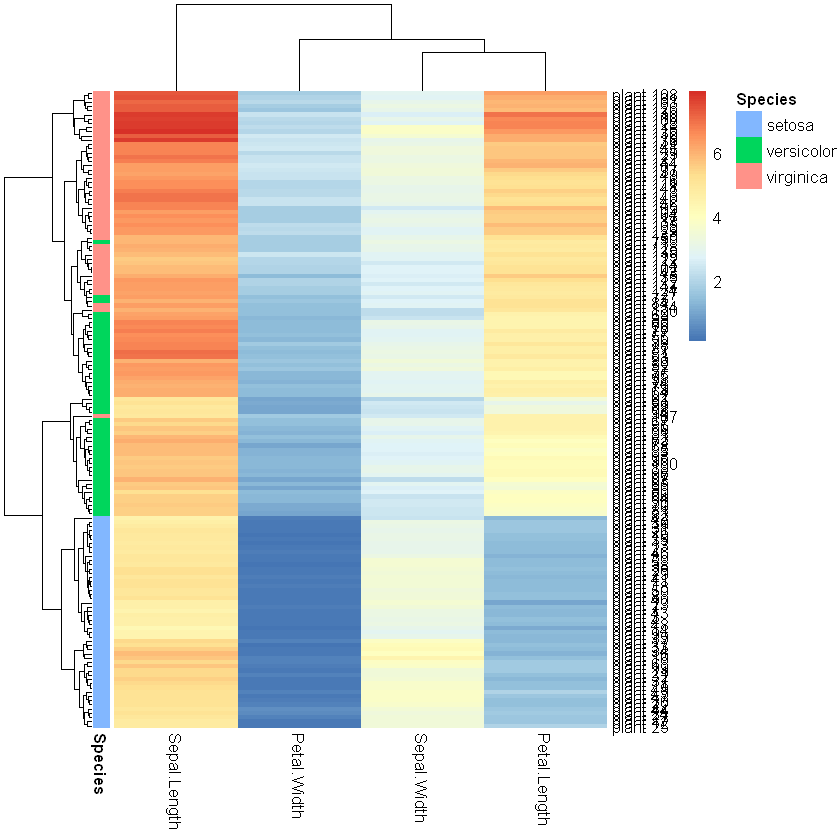

In [110]:
data(iris)
rownames(iris) <- paste("plant", 1: nrow(iris))
row_anot <- iris[, "Species", drop = FALSE]

pheatmap(iris[, -5], annotation_row = row_anot)


* exercise 7: Add a column anotation color bar, a color for Sepals and a color for Petals

* exercise 8: Stop the columns from clustering and see if you can improve the row clustering.  